In [4]:
import torch

x = torch.tensor(1., requires_grad=True)
y = 4*x**2
y.backward()

dydx = x.grad
dydx

tensor(8.)

In [7]:
def function(x1, x2, x3, x4):
    return x1*x2 + x3**2 - x4/x2

def gradient(y, x1, x2, x3, x4):
    y.backward()
    grad = [x1.grad, x2.grad, x3.grad, x4.grad]
    return grad

x1 = torch.tensor(2., requires_grad=True)
x2 = torch.tensor(3., requires_grad=True)
x3 = torch.tensor(1., requires_grad=True)
x4 = torch.tensor(4., requires_grad=True)

y = function(x1, x2, x3, x4)
grad = gradient(y, x1, x2, x3, x4)
grad

[tensor(3.), tensor(2.4444), tensor(2.), tensor(-0.3333)]

# Regressão linear usando diferenciação automática

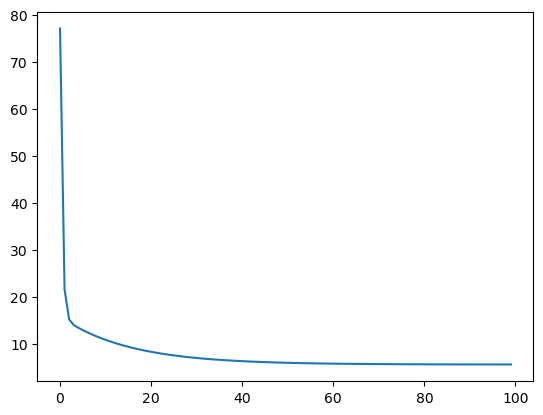

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import torch

class Model:
    def __init__(self, a: float, b: float):
        self.a = torch.tensor(a, requires_grad=True)
        self.b = torch.tensor(b, requires_grad=True)

    def __call__(self, x):
        return self.a * x + self.b

def mse(model, x, y):
    ym = model(x)
    error = torch.mean((y - ym) ** 2)
    
    return error

def step(mode, x, y, learning_rate):
    error = mse(model, x, y)
    model.a.grad = None
    model.b.grad = None
    error.backward()

    with torch.no_grad():
        model.a -= learning_rate * model.a.grad
        model.b -= learning_rate * model.b.grad

    return error.item()

def train(model, x, y, learning_rate, num_epochs):
    errors = []
    for _ in range(num_epochs):
        error = step(model, x, y, learning_rate)
        errors.append(error)

    return errors

data = torch.from_numpy(np.loadtxt("../data/age_data_1.txt"))
x, y = data.T
model = Model(a=1., b=0.)
errors = train(model, x, y, learning_rate=0.3, num_epochs=100)
plt.plot(errors)